# Зарплата

В данном пректе показано исследование данных о зарплате

**Ход исследования**

Данные о зарплатах получим из файла `Salary_Data.csv`. О качестве данных ничего не известно. Поэтому перед анализом понадобится обзор данных. 
 
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Анализ данных.

## Обзор данных

Составим первое представление о данных по зарплате.

Основной инструмент для аналитики это - `pandas`. Импортируем эту библиотеку.

In [1]:
import pandas as pd 

Прочитаем файл `Salary_Data.csv` и сохраним его в переменной `df`:

In [2]:
df=pd.read_csv('Salary_Data.csv')

Выведем на экран первые десять строк таблицы:

In [3]:
df.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


Одной командой получим общую информацию о таблице c помощью метода `info()`:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


Итак, в таблице шесть столбцов. В столбцах встречаются типы данных — `object` и `float64`.

Согласно документации к данным:
* `Age` — возраст;
* `Gender` — пол;  
* `Education Level` — уровень образования;
* `Job Title` — должность;
* `Years of Experience` — опыт работы;
* `Salary` — зарплата;


Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

В названиях колонок видны нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Встречаются пробелы.

**Выводы**

В каждой строке таблицы — данные о кадрах. Часть колонок описывает саму должнось: ее название и уровень зарплаты. Остальные данные рассказывают о человеке, который занимает данную должность: сколько ему лет , пол, уровень образования и опыт работы. 

Предварительно можно утверждать, что, данных достаточно для анализа. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных
Исправим стиль в заголовках столбцов, исключим пропуски. Затем проверим данные на дубликаты.

Выведем на экран названия столбцов:

In [5]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

Приведем названия в соответствие с хорошим стилем:
* несколько слов в названии запишем в «змеином_регистре»,
* все символы сделаем строчными.

Для этого переименуем колонки так:
* `'Age'` → `'age'`;
* `'Gender'` → `'gender'`;
* `'Education Level'` → `'education_level'`;
* `'Job Title'` → `'job_title'`;
* `'Years of Experience'` → `'years_of_experience'`;
* `'Salary'` → `'salary'`;


In [6]:
df=df.rename(columns={'Age':'age','Gender':'gender','Education Level':'education_level','Job Title':'job_title','Years of Experience':'years_of_experience','Salary':'salary'})

Проверим результат. Для этого ещё раз выведем на экран названия столбцов:

In [7]:
df.columns

Index(['age', 'gender', 'education_level', 'job_title', 'years_of_experience',
       'salary'],
      dtype='object')

### Пропуски значений

Сначала посчитаем, сколько в таблице пропущенных значений.

In [8]:
df.isna().sum()

age                    2
gender                 2
education_level        3
job_title              2
years_of_experience    3
salary                 5
dtype: int64

К сожалению пропуски есть во всех столбцах, а это помешает  для дальнейшего исследования. 
Поэтому удалим все строки с пропущенными значениями.

In [9]:
df=df.dropna()

Убедимся, что в таблице не осталось пропусков. Для этого ещё раз посчитайте пропущенные значения.

In [10]:
df.isna().sum()

age                    0
gender                 0
education_level        0
job_title              0
years_of_experience    0
salary                 0
dtype: int64

### Дубликаты

Посчитаем явные дубликаты в таблице одной командой:

In [11]:
df.duplicated().sum()

4911

Вызовем специальный метод `pandas`, чтобы удалить явные дубликаты:

In [12]:
df = df.drop_duplicates()

Ещё раз посчитаем явные дубликаты в таблице — убедимся, что полностью от них избавились:

In [13]:
df.duplicated().sum()

0

Теперь избавимся от неявных дубликатов в колонке `job_title`. Например, название одной и той же профессии может быть записано немного по-разному. Такие ошибки тоже повлияют на результат.

Выведем на экран список уникальных названий жанров, отсортированный в алфавитном порядке. Для этого:
* извлечем нужный столбец датафрейма, 
* применим к нему метод сортировки,
* для отсортированного столбца вызовем метод, который вернёт уникальные значения из столбца

In [14]:
df['job_title'].sort_values().unique()

array(['Account Manager', 'Accountant', 'Administrative Assistant',
       'Back end Developer', 'Business Analyst',
       'Business Development Manager', 'Business Intelligence Analyst',
       'CEO', 'Chief Data Officer', 'Chief Technology Officer',
       'Content Marketing Manager', 'Copywriter', 'Creative Director',
       'Customer Service Manager', 'Customer Service Rep',
       'Customer Service Representative', 'Customer Success Manager',
       'Customer Success Rep', 'Data Analyst', 'Data Entry Clerk',
       'Data Scientist', 'Delivery Driver', 'Digital Content Producer',
       'Digital Marketing Manager', 'Digital Marketing Specialist',
       'Director', 'Director of Business Development',
       'Director of Data Science', 'Director of Engineering',
       'Director of Finance', 'Director of HR',
       'Director of Human Capital', 'Director of Human Resources',
       'Director of Marketing', 'Director of Operations',
       'Director of Product Management', 'Director

#### Были обнаружены неявные дубликаты. Чтобы очистить от них таблицу используем метод `replace()`.

In [15]:
df = df.replace(['Director of Human Resources','Human Resources Director'],'Director of HR')
df = df.replace('Front end Developer','Front End Developer')            
df = df.replace('Human Resources Manager','HR Manager')
df = df.replace('IT Support Specialist','IT Support')
df = df.replace('Marketing Director','Director of Marketing')

#### Сделаем проверку, выведите отсортированный список уникальных значений столбца `job_title`:

In [16]:
df['job_title'].sort_values().unique()

array(['Account Manager', 'Accountant', 'Administrative Assistant',
       'Back end Developer', 'Business Analyst',
       'Business Development Manager', 'Business Intelligence Analyst',
       'CEO', 'Chief Data Officer', 'Chief Technology Officer',
       'Content Marketing Manager', 'Copywriter', 'Creative Director',
       'Customer Service Manager', 'Customer Service Rep',
       'Customer Service Representative', 'Customer Success Manager',
       'Customer Success Rep', 'Data Analyst', 'Data Entry Clerk',
       'Data Scientist', 'Delivery Driver', 'Digital Content Producer',
       'Digital Marketing Manager', 'Digital Marketing Specialist',
       'Director', 'Director of Business Development',
       'Director of Data Science', 'Director of Engineering',
       'Director of Finance', 'Director of HR',
       'Director of Human Capital', 'Director of Marketing',
       'Director of Operations', 'Director of Product Management',
       'Director of Sales', 'Director of Sales 

То же самое проделаем и со столбцом `education_level`

In [17]:
df['education_level'].sort_values().unique()

array(["Bachelor's", "Bachelor's Degree", 'High School', "Master's",
       "Master's Degree", 'PhD', 'phD'], dtype=object)

In [18]:
df = df.replace(["Bachelor's Degree","Master's Degree",'phD'],["Bachelor's","Master's",'PhD'])

In [19]:
df['education_level'].sort_values().unique()

array(["Bachelor's", 'High School', "Master's", 'PhD'], dtype=object)

**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

Мы исправили заголовки, чтобы упростить работу с таблицей. Без дубликатов исследование станет более точным.


## Анализ данных 

In [20]:
df.groupby('gender')['age'].count()

gender
Female    814
Male      966
Other       7
Name: age, dtype: int64

In [21]:
df.groupby('education_level')['age'].count()

education_level
Bachelor's     768
High School    110
Master's       568
PhD            341
Name: age, dtype: int64

In [22]:
def number_education_level(education_level, gender):
    education_level_list = df[(df['education_level'] == education_level) & (df['gender'] == gender)]
    education_level_count = education_level_list['age'].count()
    return education_level_count


In [23]:
high_school_male = number_education_level("High School", 'Male')
high_school_male

53

In [24]:
bachelor_s_male = number_education_level("Bachelor's", 'Male')
bachelor_s_male

440

In [25]:
master_s_male = number_education_level("Master's", 'Male')
master_s_male

255

In [26]:
phd_male = number_education_level("PhD", 'Male')
phd_male

218

In [27]:
high_school_female = number_education_level("High School", 'Female')
high_school_female

51

In [28]:
bachelor_s_female = number_education_level("Bachelor's", 'Female')
bachelor_s_female

328

In [29]:
master_s_female = number_education_level("Master's", 'Female')
master_s_female

312

In [30]:
phd_female = number_education_level("PhD", 'Female')
phd_female

123

In [31]:
high_school_other = number_education_level("High School", 'Other')
high_school_other

6

In [32]:
bachelor_s_other = number_education_level("Bachelor's", 'Other')
bachelor_s_other

0

In [33]:
master_s_other = number_education_level("Master's", 'Other')
master_s_other

1

In [34]:
phd_other = number_education_level("PhD", 'Other')
phd_other

0

In [35]:
columns = [ "gender",'high_school',"bachelor_s","master_s",'phd']
data = [['Male', high_school_male, bachelor_s_male, master_s_male, phd_male],
        ['Female', high_school_female, bachelor_s_female, master_s_female, phd_female],
        ['Other', high_school_other, bachelor_s_other, master_s_other, phd_other]
       ]
result = pd.DataFrame(data=data,columns=columns)

In [36]:
result

,gender,high_school,bachelor_s,master_s,phd
0,Male,53,440,255,218
1,Female,51,328,312,123
2,Other,6,0,1,0


In [37]:
male_gen = df[df['gender']=='Male']
female_gen = df[df['gender']=='Female']
other_gen = df[df['gender']=='Other']

In [38]:
def salary_level(df, gender, years_of_experience1, years_of_experience2):
    salary_level_df = df[(df['gender']==gender)&(df['years_of_experience']>years_of_experience1)&(df['years_of_experience']<years_of_experience2)]
    salary_level_df['salary'].plot.hist(bins = 20)
    return 

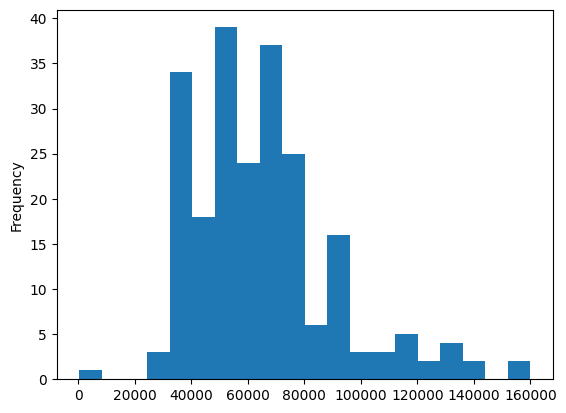

In [39]:
salary_level(male_gen, 'Male', 1, 5)

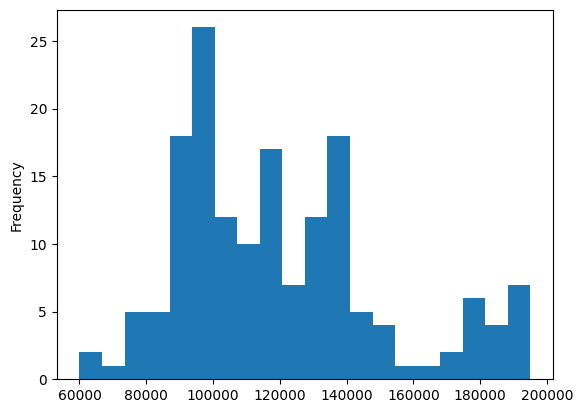

In [40]:
salary_level(male_gen, 'Male', 6, 10)

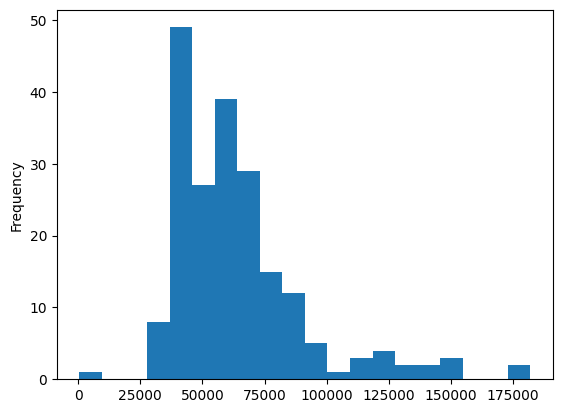

In [41]:
salary_level(female_gen, 'Female', 1, 5)

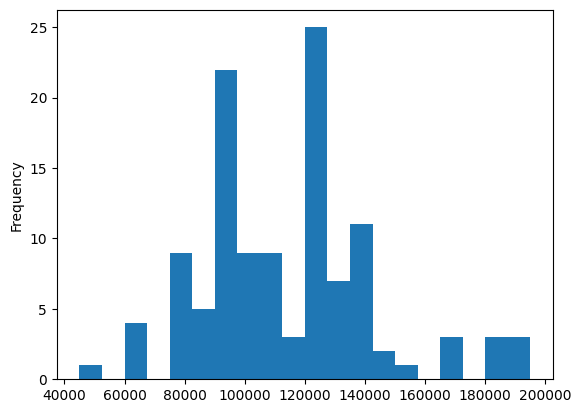

In [42]:
salary_level(female_gen, 'Female', 6, 10)

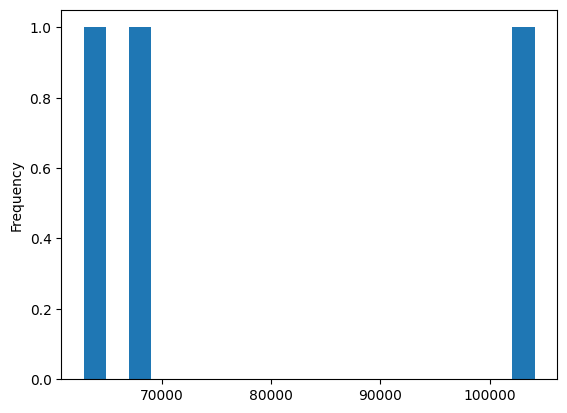

In [43]:
salary_level(other_gen,'Other',1,10)